<a href="https://colab.research.google.com/github/nhs-pycom/coding-club/blob/main/introduction-to-data-science/introduction-to-data-science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐍 🐍 **Introduction to Data Science in Python** 🐍 🐍 

**Want to learn python for your data job but don't know where to start?**

You've come to the right place!!

This session will help you learn about the benefits of using Python for data analytics and data science, through worked examples and discussions.

If you're data scientist, this might not be the right level for you but this is a good referesher of funadmental concepts.


**Created by:** 
* Mary Amanuel (Co-founder @ NHS.PyCom & Analyst @ ESA) - mary.amanuel@nhs.net

* Josh Strong (NHS.PyCom contributor & Data Science Analyst @ ESA) - joshua.strong@nhs.net


Join us in Slack! https://join.slack.com/t/nhs-pycom/shared_invite/zt-z6h1hszo-3_w68FdalVM2EATVVdgCuw

---



#**What's programming?**

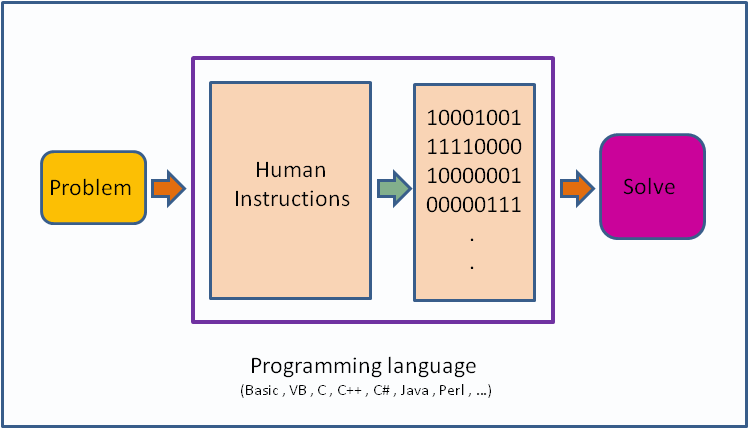

**Programming**

  using code to make a computer perform desired actions

**Code**

  code is a set of rules or instructions you give to computer

**Integrated Development Environment** -- connect!

  software for building applications that combines common  developer tools into a single graphical user interface (GUI)
  
**Programming principles**


https://media.ed.ac.uk/media/1_wk3zo6cn - Pawel Orzechowski

1. Programming is a storytelling exercise.
2. Programming is social.
3. Programming is a craft, like knitting.
4. Programming is fun.
5. Programming is creative.

> Programming is a storytelling exercise. It's like telling a joke or negotiating bedtime with a child or telling the way to a tourist that doesn't quite speak your language. It's about sharing your thoughts in the language that's understandable to your audience while leveraging their strengths and avoiding their weaknesses.





# **So why should we care about python?**

<div>
<img src=https://breakbrunch.com/wp-content/uploads/2020/05/dev-humor-5ea3571e7221a7c83.jpg width="700">
</div>

Python is an open source, state of the art programming language, used by developers, data scientists, and data engineers. Python's widespread adoption is, in part, due to its accessible 'human readable' syntax, making it relatively easy to pick up and learn.

**Used for:**
Data science, machine learning, data eng, software development 


**Why is python so popular?**

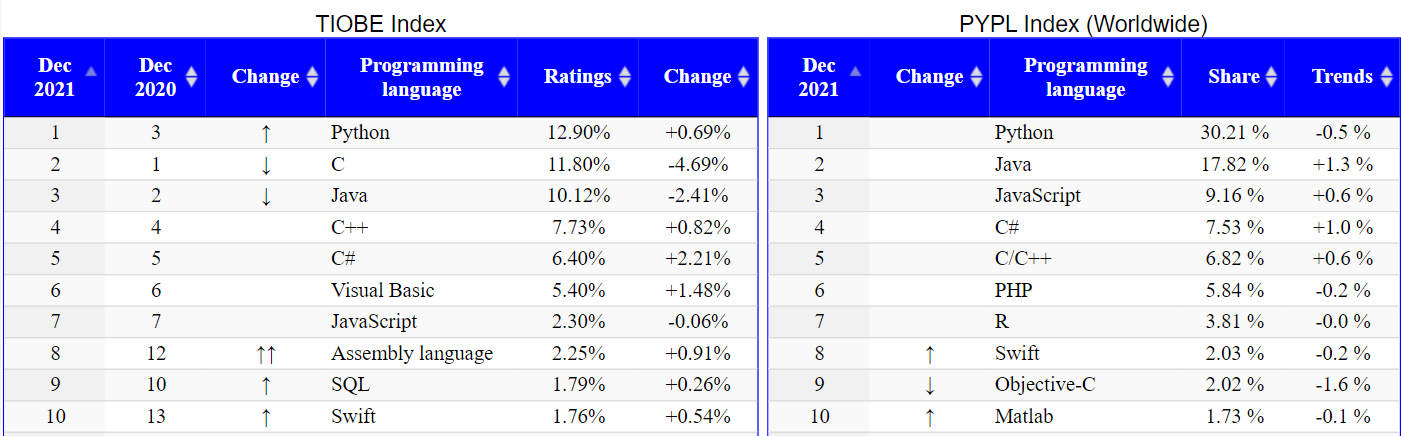

**When another tool might be better:**

Excel - data maniplation

R - Econometrics and stats, data viz

Power Bi, Tableau, - data viz


#**Let's begin!**

##**The Analytical question** ❓
### **How well can deprivation and other variables scores predict use GP practics of online health services?**





## **Data sets** 

1. [Patient Online ](https://digital.nhs.uk/data-and-information/data-collections-and-data-sets/data-collections/pomi) - Online

Patient Online is an NHS England programme designed to support GP Practices to offer and promote online services to patients, including access to coded information in records, appointment booking and ordering of repeat prescriptions.

Data are provided by GP system suppliers to NHS Digital on a monthly basis and published on the 15th working day each month pending no issues, otherwise as soon as possible thereafter.

2. [FHE fingertips](https://https://fingertips.phe.org.uk/) - Demographics

Import fingertips_py package - This is a python package to interact with Public Health England’s [Fingertips](https://fingertips.phe.org.uk/) data tool. Fingertips is a major repository of population and public health indicators for England.

code: https://github.com/nhsx/online-services-demographic-modelling/blob/Dev/patient-online-deprivation-score-model-2021-data.ipynb



## **Import Libraries**

A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs.

**DataFrame**

2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table

**Variable**

Python variable is a reserved memory location to store values

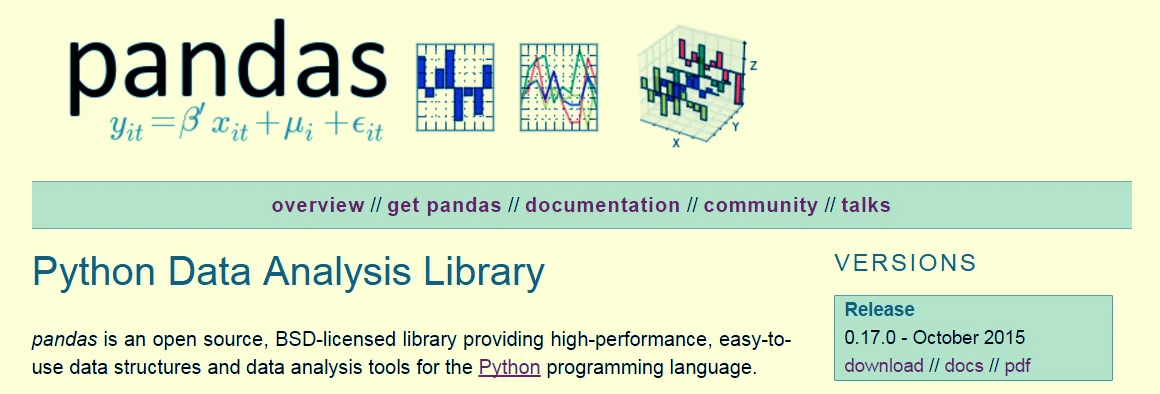

In [ ]:
import pandas as pd

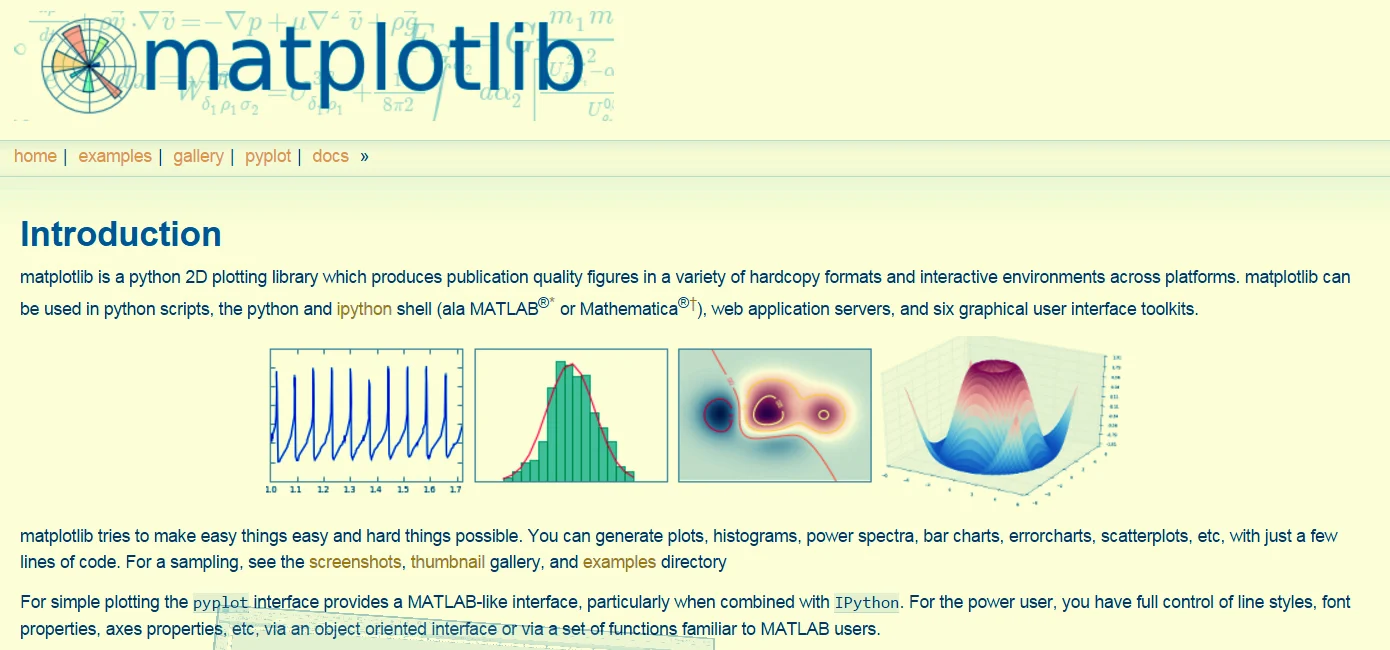

In [ ]:
import matplotlib.pyplot as plt

**Web scrapping**

A web scraper is a specialized tool designed to accurately and quickly extract data from a web page.

In [ ]:
# Get the weblink of the data dictionary xlsx file, and pass this to be read directly into a Pandas dataframe
link = 'https://digital.nhs.uk/binaries/content/assets/legacy/excel/pomi-csv-metadata.xlsx'
data_dict = pd.read_excel(link,sheet_name='Data dictionary', header=7)

# Print selected features and their descriptions, from this dataframe
for feat, description, _ in data_dict.values:
  print(f'Feature Name: {feat} \n Description: {description} \n\n')

## Data ingestion

In [ ]:
# option 1: upload - run then pause
from google.colab import files
file = files.upload()

In [ ]:
# option 2: upload
data = pd.read_csv("")

In [ ]:
# option 3: webscrape - file is huge and we got to keep this notebook open

# The POMI dataset is too large to read directly from google drive into a pandas dataframe
# so we use gdown to assist: https://pypi.org/project/gdown/
import gdown

# URL where POMI data is stored in google drive
url = 'https://drive.google.com/file/d/1_cDal8xLrj0NJd82kg3PRqeP8pMbw0Fq/view?usp=sharing'
# output file name
output = "POMI.csv"
# 
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

POMI = pd.read_csv('/content/POMI.csv')

## Data inspecting


In [ ]:
POMI.head()
POMI.info()
POMI.describe()
#POMI.isnull().values.any()

## Data cleaning

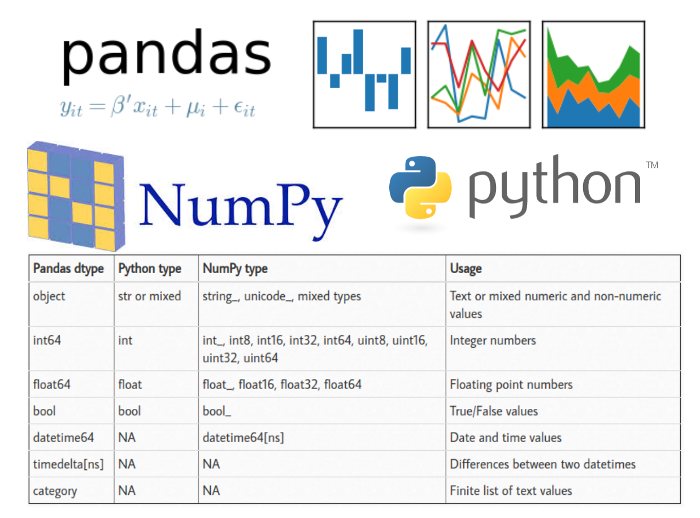

In [ ]:
POMI['report_period_end'] = pd.to_datetime(POMI['report_period_end'])
POMI['ccg_name'] = POMI['ccg_name'].replace(['NHS Herefordshire CCG'],'NHS Herefordshire and Worcestershire CCG')
POMI['ccg_name'] = POMI['ccg_name'].replace(['NHS Herts Valley CCG'],'NHS Herts Valleys CCG')
POMI['ccg_name'] = POMI['ccg_name'].str.upper()
POMI['practice_name'] = POMI['practice_name'].str.upper()

POMI.info()

POMI.head()

## Data transformation

In [ ]:
POMI_pivot =  pd.pivot_table(POMI, index = ['report_period_end', 'practice_name', 'practice_code', 'region_code', ], columns = 'field', values = 'value')
POMI_filter = POMI_pivot.drop(['New_Pat_Enbld','Pat_Appts_Enbld', 'Pat_DetCodeRec_Enbld','Pat_DetCodeRec_Use','Pat_Presc_Enbld','Sys_Appts_Enbld','Sys_DetCodeRec_Enbld','Sys_Presc_Enbld','Total_Pat_Enbld'], axis=1)
POMI_filter = POMI_filter.reset_index()
POMI_filter



In [ ]:
#data checking
patient_list_size_check = POMI_filter[['report_period_end','patient_list_size']].groupby('report_period_end').sum()
patient_list_size_check 

In [ ]:
# data filtering and aggregation
POMI_march_2021 = POMI_filter[POMI_filter['report_period_end'] == '2020-03-31']
POMI_march_2021

#POMI_march_2021_gp = POMI_march_2021[['practice_name', 'practice_code', 'Pat_Appts_Use', 'Pat_Presc_Use', 'Total_Use', 'patient_list_size']].groupby(['practice_code', 'practice_name']).sum()
#POMI_march_2021_gp = POMI_march_2021.reset_index()
#POMI_march_2021_gp

## Standardisation

In [ ]:
POMI_march_2021_gp['Pat_Presc_Use_per_1000'] = (POMI_march_2021_gp['Pat_Presc_Use'] / POMI_march_2021_gp['patient_list_size']) * 1000
POMI_march_2021_gp['Pat_Appts_Use_per_1000'] = (POMI_march_2021_gp['Pat_Appts_Use'] / POMI_march_2021_gp['patient_list_size']) * 1000
POMI_march_2021_per_1000 = POMI_march_2021_gp.round(2)

POMI_march_2021_per_1000 
#POMI_march_2021_per_1000.reset_index

## Joining our PHE Demographics dataset
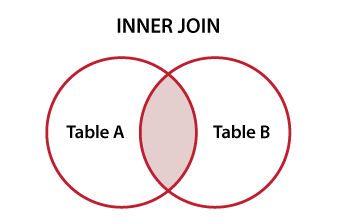

In [ ]:
# import dataset
url = 'https://drive.google.com/file/d/133LVAQzytz3nNHQoRegweSURSSx10xlM/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
gp_demographics = pd.read_csv(path)
gp_demographics 

In [ ]:
## joining data

#gpod_df = POMI_march_2021_gp_per_1000.merge(gp_demographics , left_on='practice_code', right_on ='Area_Code')
gpod_df = POMI_march_2021_per_1000.merge(gp_demographics , left_on='practice_code', right_on ='Area_Code')
gpod_df
#gpod_df.info()

## new csv!
#gpod_df.to_csv('gp_patient_online_deprivation.csv')

In [ ]:
test = gpod_df[['practice_code', 'Area_Code']]
test

In [ ]:
# find missing data
print(gpod_df.isnull().sum()) 
gpod_df.info()

In [ ]:
gpod_df = gpod_df.drop(columns=['index', 'Unnamed: 0', 'Area_Code'])

In [ ]:
gpod_df

In [ ]:
# aggreating ages

gpod_df['1-19 yrs'] = gpod_df['0-4 yrs'] + gpod_df['5-9 yrs'] + gpod_df['10-14 yrs'] + gpod_df['15-19 yrs']
gpod_df['20-39 yrs'] = gpod_df['20-24 yrs'] + gpod_df['25-29 yrs'] + gpod_df['30-34 yrs'] + gpod_df['35-39 yrs']
gpod_df['40-59 yrs'] = gpod_df['40-44 yrs'] + gpod_df['45-49 yrs'] + gpod_df['50-54 yrs'] + gpod_df['55-59 yrs']
gpod_df['60-79 yrs'] = gpod_df['60-64 yrs'] + gpod_df['65-69 yrs'] + gpod_df['70-74 yrs'] + gpod_df['75-79 yrs'] 
gpod_df['80+ yrs'] = gpod_df['80-84 yrs'] + gpod_df['85-89 yrs'] + gpod_df['90-94 yrs'] + gpod_df['95+ yrs']

# Can easily check that we've made no mistakes using assert command below
# This code checks that all proportions add up correctly to 100 (allowing 0.01 error)
assert (gpod_df['1-19 yrs'] + gpod_df['20-39 yrs'] + gpod_df['40-59 yrs'] + gpod_df['60-79 yrs'] + gpod_df['80+ yrs'].between(99.99,100)).all()

## Exploratory data analysis through data viz

In [ ]:
#histograms

gpod_df.describe()
gpod_df.hist(figsize=(14,14), xrot=45)
plt.show()

In [ ]:
#box plots
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x = 'decile', y = 'Pat_Presc_Use_per_1000', data = gpod_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

sns.boxplot(x = 'decile', y = 'Pat_Presc_Use_per_1000', data = gpod_df)
plt.show()

# Data Science, Machine Learning and Statistical Libraries

## Scikit-Learn: https://scikit-learn.org/stable/#

<div>
<img src=https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg width="500">
</div>

### What is Scikit-learn?

Scikit-learn is arguably the most popular open-source machine learning library for out-of-the-box development of DS projects in Python. Having a massive active community behind it, with extensive documentation and resources, scikit-learn is the perfect toolkit for beginners and ML-novices to get started quickly on their DS projects.


Sci-kit learn provides functionality to tackle the following topics:

* Regression (i.e. predicting a continuous response using independent variables)
* Classification (i.e. predicting discrete responses using independent variables)
* Clustering (i.e. grouping data into similar groups)
* Dimensionality Reduction (i.e. compressing large datasets with many features into a smaller datasets with fewer features) 
* Model Selection (i.e. methods for comparing and evaluating the performances of models)
* Preprocessing (i.e. tools required for the preparation of data neccesary for DS projects)
* Synthetic data generation tools

... the whole DS pipeline for any task!


Pros:
* Easy out-of-the-box modelling
* Consistent approach in code in regards to implementation of models
* Excellent documentation with working examples
* Large community of support behind the library
* Open-source

Cons:
* More sophisticated modelling require more sophisticated libraries e.g. deep-learning
* Lack of time-series modelling tools

Our Analytical Question: **How well can deprivation scores predict a GP practics use of online health services?**


Response: 
* y = Patient prescription use per 1000 registered patients - 'Pat_Persc_Use_Per_1000'

Features:
* $x_1$ = Deprivation score - 'Deprivation_Score_IMD_2019' 
* $x_2$ = Proportion of registered Female GP patients - 'Proportion Female' 
* $x_3$ = Proportion of patients who are 1-19 years old - '1-19 yrs' 
* $x_4$ = Proportion of patients who are 20-39 years old - '20-39 yrs'
* $x_5$ = Proportion of patients who are 40-59 years old - '40-59 yrs'
* $x_6$ = Proportion of patients who are 60-79 years old - '60-79 yrs'
* $x_7$ = Proportion of patients who are 80+ years old - '80+ yrs'

N.B. we do not use $x_7$ in our statistical modelling approach. 



### Using Scikit-Learn to prepare data for modelling

Data that is fed into models and data in our spreadsheets are two different things. Firstly, models can only learn relationships from numbers, therefore we must use a method to convert our categorical features into numerical ones. In addition to this, in order to get a sense of the generalised performance of our model in the real word, we would ideally like to test the model against data that it is not trained on. To do this, we need to form a train-test split, which will split our data into two sections: training data and testing data. All of this can be done using Scikit-Learn.

#### Imputation

For various reasons, many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.


There's lots of methods of doing this! Below, I implement a really simple example of imputing missing values based on the mean of other observations - but other more complex (and definitely more useful) approaches are available. 

Read more in the User Guide: https://scikit-learn.org/stable/modules/impute.html#impute

In [ ]:
# Load libraries required for imputing
from sklearn.impute import SimpleImputer
import numpy as np

# Generate imputation object
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit the imputation object to our data to be imputed
imp.fit(gpod_df['Pat_Appts_Use_per_1000'].values.reshape(-1,1))
# Impute the missing values and make new column
gpod_df['imputed_Pat_Appts_Use_per_1000'] = imp.transform(gpod_df['Pat_Appts_Use_per_1000'].values.reshape(-1,1))

print("Number of missing values in 'Total_Use_per_1000' feature:", gpod_df['Pat_Appts_Use_per_1000'].isna().sum())
print("Number of missing values in imputed 'imputed_Total_Use_per_1000' feature:", gpod_df['imputed_Pat_Appts_Use_per_1000'].isna().sum())

#### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

# Store deprivation response in variable y
y = gpod_df['imputed_Pat_Appts_Use_per_1000']
# Store explanatory features in variable X
X = gpod_df[['Deprivation_Score_IMD_2019',
             'Proportion_Female',
             '1-19 yrs',
             '20-39 yrs',
             '40-59 yrs',
             '60-79 yrs',
             '80+ yrs']]

# Make train-test split with 10% testing size
# Random state allows for reproducibility in training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Using Scikit-Learn to train your model and evaluate the performance

As the data is now prepared, we can now get on with the fun bit: modelling!

#### Training Your ML Model 

Training an ML model in Scikit-learn is extremely easy, consisting of two lines of code:
1. Create an object of the model
1. Fit the object with your training data

... it's that easy! The structure of this code is consistent for any model you use.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. Create a Gradient Boosting modelling object
reg = GradientBoostingRegressor(random_state=0)
# 2. Call .fit() on this object to train the model with your training data
reg.fit(X_train, y_train)

#### Optional: Hyperparamter optimisation

When squeezing performance out of a ML model, we usually need to fine-tune the "hyperparameters" of a model. These are the "dials" or "settings" a model has which defines things such as how fast the model learns or fixed characteristics of the model.

One method of finding these optimal hyperparameters is through a trail-and-error method, called grid-search. In a grid-search, the model is trained with specific combinations of these hyper-parameters and the performance is reported. This is repeated for numerous combinations, and usually the hyperparameters in the model with the best "validation" score are used.

This is easily implemented below, using RandomizedSearchCV, which implements a "random" version of grid-search.

In [ ]:
# Credit (and great scikit-learn learning source): 
# https://inria.github.io/scikit-learn-mooc/python_scripts/ensemble_hyperparameters.html

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Choose a selection of hyperparameters to select from
param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
}

# Initalise a grid-search object, passing
# GradientBoostingRegressor: A gradient boosting model
# param_distributions: Selection of hyperparameters to try out (see above)
# scoring: Which metric to evaluate the model against
# n_iter: Number of parameter settings to be sampled
# see more here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
search_cv = RandomizedSearchCV(
    GradientBoostingRegressor(), 
    param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", 
    n_iter=20,
    verbose=1, 
    random_state=0, n_jobs=2
)

# Fit the model with our training data for each fit!
search_cv.fit(X_train, y_train)

In [ ]:
# Report performance
columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

In [ ]:
# Save our best performing model in 'best_model' variable
best_model = search_cv.best_estimator_

#### Evaluating Performance

Scikit-learn provides a multitude of metrics for both classification and regression tasks. 

In [ ]:
# Import desired metrics
from sklearn.metrics import mean_squared_error as skl_mse, mean_absolute_error as skl_mae

# Pass labels and predictions to imported functions
mse_test = skl_mse(y_test, best_model.predict(X_test))
mae_test = skl_mae(y_test, best_model.predict(X_test))
mse_train = skl_mse(y_train, best_model.predict(X_train))
mae_train = skl_mae(y_train, best_model.predict(X_train))

print("The mean squared error (MSE) on train set: {:.4f}".format(mse_train))
print("The mean absolute error (MAE) on train set: {:.4f}".format(mae_train))

print("\nThe mean squared error (MSE) on test set: {:.4f}".format(mse_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae_test))

#### Investigating Feature Importance

As mentioned earlier, Scikit-learn documentation is fantastic. Below is a snippet of code I copy-pasted from from the documentation examples, and only had to change 2 variable names!

In [ ]:
## Taken from https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#plot-feature-importance

import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

## Statsmodels: https://www.statsmodels.org/stable/#

<div>
<img src=
https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg width="500">
</div>

### What is statsmodels?

Statsmodels is a modelling library in Python, with more of a focus on statistcal modelling as opposed to machine learning in Scikit-Learn.

* Regression and Linear Models
* Time Series Analysis
* Survival Analysis
* Statistical tests

Pros:
* Easy out-of-the-box modelling
* Excellent forecasting tools
* Allows to fit models using R-notation for R-users
* Large community of support behind the library
* Open-source

Cons:
* Some features in statistical modelling which is found in R is not implemented in statsmodels e.g. feature selection

### Fitting linear regression - R-style!

A lot of economists and statisticians are trained using R, rightly so due to R's key strength being statistical modelling. However, in recent years, this key advantage of R over Python has been identified and improved upon in Python through libraries such as Statsmodels. R users should not fear though, as one neat feature of Statsmodels allows you to implement modelling using conventional R notation and view all your favourite modelling output which conveniently looks very similar to that in R...

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# R-style model to fit
model = 'imputed_Pat_Appts_Use_per_1000 ~ Deprivation_Score_IMD_2019 + Proportion_Female + Q("1-19 yrs") + Q("20-39 yrs") + Q("40-59 yrs") + Q("60-79 yrs")'

# Fit the OLS model, passing the model and dataframe
mod = smf.ols(formula=model, data=gpod_df).fit()

In [ ]:
# Get predictions, also using conventional R code
pred_ols = mod.get_prediction()
pred_ols.summary_frame()

Using statsmodels to evaluate OLS model performance

In [ ]:
print(mod.summary())

In [ ]:
from statsmodels.tools.eval_measures import mse as sm_mse, meanabs as sm_mae

mse = sm_mse(pred_ols.summary_frame()['mean'].values, gpod_df.imputed_Pat_Appts_Use_per_1000.values)
mae = sm_mae(pred_ols.summary_frame()['mean'].values, gpod_df.imputed_Pat_Appts_Use_per_1000.values)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = ['Deprivation_Score_IMD_2019',
            '60-79 yrs']

pd.Series([variance_inflation_factor(X[features].values, i) for i in range(X[features].shape[1])], index=X[features].columns)